<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data_multi_delta_(1_6)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.6_n250.csv',
 'data_multi_delta_1.6_n120.csv',
 'data_multi_delta_1.6_n60.csv',
 'data_multi_delta_1.6_n30.csv',
 'data_multi_delta_1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,96.752107,60.482065,68.456756,21.873232,10.004756,267.568916,238.909575,28.659341
1,0.0,1.0,74.440283,20.957141,92.136017,59.963883,-4.815273,252.682052,253.484180,-0.802128
2,0.0,2.0,87.542934,83.254483,48.735176,29.690757,-63.137015,196.086335,246.215205,-50.128870
3,0.0,3.0,93.942006,20.986682,30.863303,96.925288,25.939583,278.656862,274.027346,4.629516
4,0.0,4.0,50.462659,99.152509,31.126594,71.235860,38.339336,300.316958,269.503148,30.813810
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,78.358877,27.301859,81.604118,59.222665,-20.211007,236.276511,258.369707,-22.093196
19996,999.0,16.0,91.082950,43.543065,54.153293,92.366386,5.931373,297.077067,304.273424,-7.196357
19997,999.0,17.0,55.289655,87.439403,32.513948,72.551612,-39.417833,218.376785,269.568877,-51.192093
19998,999.0,18.0,98.160360,42.921147,68.651809,71.096603,-8.904374,281.925545,309.769021,-27.843476


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,96.752107,60.482065,68.456756,21.873232,10.004756,267.568916,238.909575,28.659341
1,0.0,1.0,74.440283,20.957141,92.136017,59.963883,-4.815273,252.682052,253.484180,-0.802128
2,0.0,2.0,87.542934,83.254483,48.735176,29.690757,-63.137015,196.086335,246.215205,-50.128870
3,0.0,3.0,93.942006,20.986682,30.863303,96.925288,25.939583,278.656862,274.027346,4.629516
4,0.0,4.0,50.462659,99.152509,31.126594,71.235860,38.339336,300.316958,269.503148,30.813810
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,78.358877,27.301859,81.604118,59.222665,-20.211007,236.276511,258.369707,-22.093196
19996,999.0,16.0,91.082950,43.543065,54.153293,92.366386,5.931373,297.077067,304.273424,-7.196357
19997,999.0,17.0,55.289655,87.439403,32.513948,72.551612,-39.417833,218.376785,269.568877,-51.192093
19998,999.0,18.0,98.160360,42.921147,68.651809,71.096603,-8.904374,281.925545,309.769021,-27.843476


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    96.752107  60.482065  68.456756  21.873232  10.004756   
      1.0    74.440283  20.957141  92.136017  59.963883  -4.815273   
      2.0    87.542934  83.254483  48.735176  29.690757 -63.137015   
      3.0    93.942006  20.986682  30.863303  96.925288  25.939583   
      4.0    50.462659  99.152509  31.126594  71.235860  38.339336   
...                ...        ...        ...        ...        ...   
999.0 15.0   78.358877  27.301859  81.604118  59.222665 -20.211007   
      16.0   91.082950  43.543065  54.153293  92.366386   5.931373   
      17.0   55.289655  87.439403  32.513948  72.551612 -39.417833   
      18.0   98.160360  42.921147  68.651809  71.096603  -8.904374   
      19.0   69.671747  33.187393  87.872462  46.818825  20.162654   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    267.568916  238.909575  28.659341  
      1.0    252.682052  253.484180  -0.802128  
      2.0    196.086335  246.215205 -50.128870  
      3.0    278.656862  274.027346   4.629516  
      4.0    300.316958  269.503148  30.813810  
...                 ...         ...        ...  
999.0 15.0   236.276511  258.369707 -22.093196  
      16.0   297.077067  304.273424  -7.196357  
      17.0   218.376785  269.568877 -51.192093  
      18.0   281.925545  309.769021 -27.843476  
      19.0   267.713081  248.899313  18.813768  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    96.752107  60.482065  68.456756  21.873232  10.004756   
      1.0    74.440283  20.957141  92.136017  59.963883  -4.815273   
      2.0    87.542934  83.254483  48.735176  29.690757 -63.137015   
      3.0    93.942006  20.986682  30.863303  96.925288  25.939583   
      4.0    50.462659  99.152509  31.126594  71.235860  38.339336   
...                ...        ...        ...        ...        ...   
999.0 15.0   78.358877  27.301859  81.604118  59.222665 -20.211007   
      16.0   91.082950  43.543065  54.153293  92.366386   5.931373   
      17.0   55.289655  87.439403  32.513948  72.551612 -39.417833   
      18.0   98.160360  42.921147  68.651809  71.096603  -8.904374   
      19.0   69.671747  33.187393  87.872462  46.818825  20.162654   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    267.568916  238.909575  28.659341  
      1.0    252.682052  253.484180  -0.802128  
      2.0    196.086335  246.215205 -50.128870  
      3.0    278.656862  274.027346   4.629516  
      4.0    300.316958  269.503148  30.813810  
...                 ...         ...        ...  
999.0 15.0   236.276511  258.369707 -22.093196  
      16.0   297.077067  304.273424  -7.196357  
      17.0   218.376785  269.568877 -51.192093  
      18.0   281.925545  309.769021 -27.843476  
      19.0   267.713081  248.899313  18.813768  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,96.752107,60.482065,68.456756,21.873232,10.004756,267.568916,238.909575,28.659341
1,0.0,1.0,74.440283,20.957141,92.136017,59.963883,-4.815273,252.682052,253.484180,-0.802128
2,0.0,2.0,87.542934,83.254483,48.735176,29.690757,-63.137015,196.086335,246.215205,-50.128870
3,0.0,3.0,93.942006,20.986682,30.863303,96.925288,25.939583,278.656862,274.027346,4.629516
4,0.0,4.0,50.462659,99.152509,31.126594,71.235860,38.339336,300.316958,269.503148,30.813810
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,78.358877,27.301859,81.604118,59.222665,-20.211007,236.276511,258.369707,-22.093196
19996,999.0,16.0,91.082950,43.543065,54.153293,92.366386,5.931373,297.077067,304.273424,-7.196357
19997,999.0,17.0,55.289655,87.439403,32.513948,72.551612,-39.417833,218.376785,269.568877,-51.192093
19998,999.0,18.0,98.160360,42.921147,68.651809,71.096603,-8.904374,281.925545,309.769021,-27.843476


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    96.752107  60.482065  68.456756  21.873232  10.004756   
      1.0    74.440283  20.957141  92.136017  59.963883  -4.815273   
      2.0    87.542934  83.254483  48.735176  29.690757 -63.137015   
      3.0    93.942006  20.986682  30.863303  96.925288  25.939583   
      4.0    50.462659  99.152509  31.126594  71.235860  38.339336   
...                ...        ...        ...        ...        ...   
999.0 15.0   78.358877  27.301859  81.604118  59.222665 -20.211007   
      16.0   91.082950  43.543065  54.153293  92.366386   5.931373   
      17.0   55.289655  87.439403  32.513948  72.551612 -39.417833   
      18.0   98.160360  42.921147  68.651809  71.096603  -8.904374   
      19.0   69.671747  33.187393  87.872462  46.818825  20.162654   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    267.568916  238.909575  28.659341  
      1.0    252.682052  253.484180  -0.802128  
      2.0    196.086335  246.215205 -50.128870  
      3.0    278.656862  274.027346   4.629516  
      4.0    300.316958  269.503148  30.813810  
...                 ...         ...        ...  
999.0 15.0   236.276511  258.369707 -22.093196  
      16.0   297.077067  304.273424  -7.196357  
      17.0   218.376785  269.568877 -51.192093  
      18.0   281.925545  309.769021 -27.843476  
      19.0   267.713081  248.899313  18.813768  

[20000 rows x 8 columns]

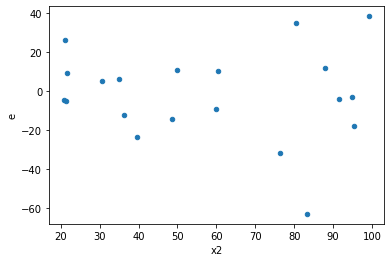

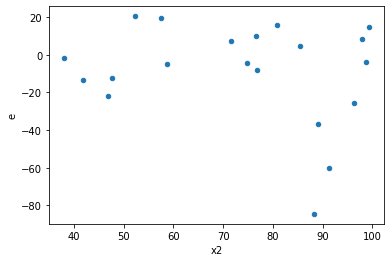

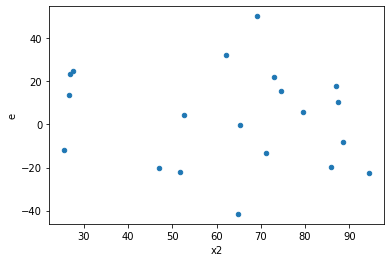

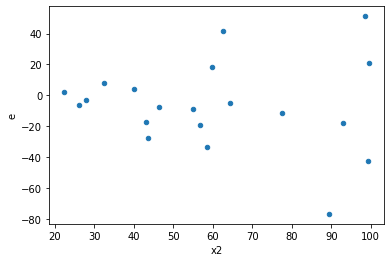

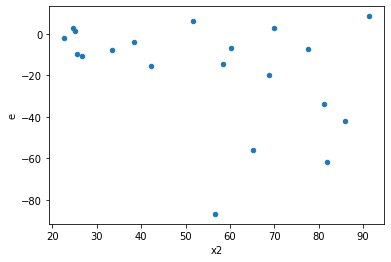

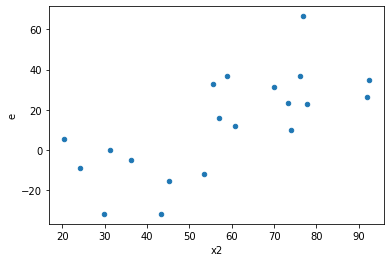

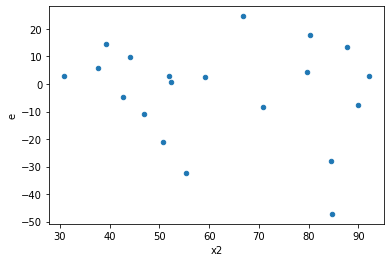

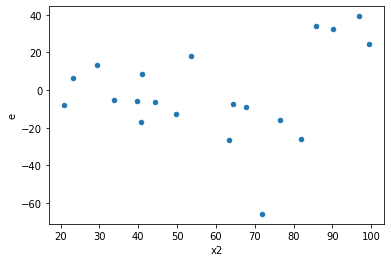

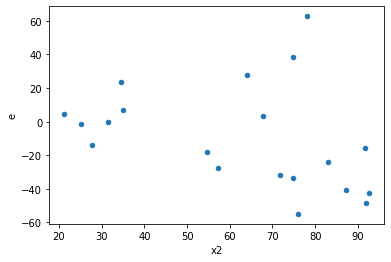

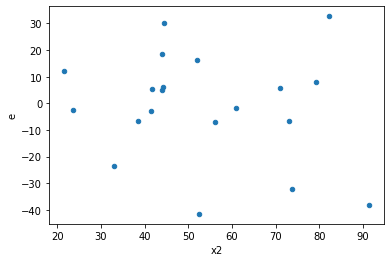

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,4.0,4.0,171.80175591013793,1364.8077048817981,42.95043897753448,341.20192622044954,7.944084725162355,0.06941261835368429,0.9652936908231579,0.03470630917684214,Reject005=1 : Homoscedasticity
1.0,4.0,4.0,180.67130051857427,4135.310160750001,45.16782512964357,1033.8275401875003,22.888583570719703,0.010220640614345688,0.9948896796928272,0.005110320307172844,Reject005=0 : Heteroscedasticity
3.0,4.0,4.0,555.9120605809144,9321.236025854238,138.9780151452286,2330.3090064635594,16.76746501256651,0.018293265157280247,0.9908533674213599,0.009146632578640124,Reject005=0 : Heteroscedasticity
4.0,4.0,4.0,126.1790935044144,2589.7622904412938,31.5447733761036,647.4405726103234,20.52449592491874,0.012549354552956249,0.9937253227235219,0.0062746772764781245,Reject005=0 : Heteroscedasticity
6.0,4.0,4.0,598.1417751524441,2307.928520955848,149.53544378811102,576.982130238962,3.858497461354614,0.21930526277740747,0.8903473686112963,0.10965263138870374,Reject005=1 : Homoscedasticity
7.0,4.0,4.0,44.37391362255248,3093.374533143315,11.09347840563812,773.3436332858288,69.71155529475648,0.001188656940744881,0.9994056715296276,0.0005943284703724405,Reject005=0 : Heteroscedasticity
8.0,4.0,4.0,379.9109680594912,490.78771953012625,94.9777420148728,122.69692988253156,1.2918493036328254,0.8100190825855935,0.5949904587072032,0.40500954129279676,Reject005=1 : Homoscedasticity
9.0,4.0,4.0,589.3739170251067,1287.2948238881822,147.34347925627668,321.82370597204556,2.184173385863197,0.4678770731646298,0.7660614634176851,0.2339385365823149,Reject005=1 : Homoscedasticity
11.0,4.0,4.0,353.60901152997525,4956.148634199433,88.40225288249381,1239.0371585498583,14.01590025309438,0.02542879798491593,0.987285601007542,0.012714398992457965,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,171.80175591013793,1364.8077048817981,42.95043897753448,341.20192622044954,7.944084725162355,0.06941261835368429,Reject005=1 : Homoscedasticity
1.0,4.0,4.0,180.67130051857427,4135.310160750001,45.16782512964357,1033.8275401875003,22.888583570719703,0.010220640614345688,Reject005=0 : Heteroscedasticity
2.0,4.0,4.0,1008.5830937362514,493.05659348389935,252.14577343406285,123.26414837097484,0.48886065664395884,0.5052678116883558,Reject005=1 : Homoscedasticity
3.0,4.0,4.0,555.9120605809144,9321.236025854238,138.9780151452286,2330.3090064635594,16.76746501256651,0.018293265157280247,Reject005=0 : Heteroscedasticity
4.0,4.0,4.0,126.1790935044144,2589.7622904412938,31.5447733761036,647.4405726103234,20.52449592491874,0.012549354552956249,Reject005=0 : Heteroscedasticity
5.0,4.0,4.0,578.6155501072933,526.9236835384995,144.65388752682333,131.73092088462488,0.9106628458927374,0.9299153821895231,Reject005=1 : Homoscedasticity
6.0,4.0,4.0,598.1417751524441,2307.928520955848,149.53544378811102,576.982130238962,3.858497461354614,0.21930526277740747,Reject005=1 : Homoscedasticity
7.0,4.0,4.0,44.37391362255248,3093.374533143315,11.09347840563812,773.3436332858288,69.71155529475648,0.001188656940744881,Reject005=0 : Heteroscedasticity
8.0,4.0,4.0,379.9109680594912,490.78771953012625,94.9777420148728,122.69692988253156,1.2918493036328254,0.8100190825855935,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      763
Reject005=0 : Heteroscedasticity    237
Name: Result_test, dtype: int64